In [1]:
!git clone https://github.com/gabrieldgf4/PlantVillage-Dataset.git

Cloning into 'PlantVillage-Dataset'...
remote: Enumerating objects: 54511, done.
remote: Counting objects: 100% (108/108), done.
remote: Compressing objects: 100% (108/108), done.
remote: Total 54511 (delta 36), reused 0 (delta 0), pack-reused 54403
Receiving objects: 100% (54511/54511), 806.27 MiB | 34.53 MiB/s, done.
Resolving deltas: 100% (50/50), done.
Checking out files: 100% (54306/54306), done.


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf
import tensorflow.keras.layers as tfl
from keras.callbacks import History
from keras.callbacks import ModelCheckpoint, TensorBoard

from keras.engine import training
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, Dropout, Activation, Average
from keras.losses import categorical_crossentropy
from keras.models import Model, Input


from tensorflow.python.framework.ops import Tensor
from typing import Tuple, List
import glob
import numpy as np
import os
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.layers.experimental.preprocessing import RandomFlip, RandomRotation

In [3]:
BATCH_SIZE = 32
IMG_SIZE = (160, 160)
directory = "/content/PlantVillage-Dataset/Tomato"
train_dataset = image_dataset_from_directory(directory,
                                             shuffle=True,
                                             batch_size=BATCH_SIZE,
                                             image_size=IMG_SIZE,
                                             validation_split=0.2,
                                             subset='training',
                                             seed=42)
validation_dataset = image_dataset_from_directory(directory,
                                             shuffle=True,
                                             batch_size=BATCH_SIZE,
                                             image_size=IMG_SIZE,
                                             validation_split=0.2,
                                             subset='validation',
                                             seed=42)

FileNotFoundError: ignored

In [4]:
import glob
Tomato___Bacterial_spot = glob.glob('/content/PlantVillage-Dataset/Tomato___Bacterial_spot/*.*')
Tomato___Early_blight = glob.glob('/content/PlantVillage-Dataset/Tomato___Early_blight/*.*')
Tomato___Late_blight = glob.glob('/content/PlantVillage-Dataset/Tomato___Late_blight/*.*')
Tomato___Leaf_Mold = glob.glob('/content/PlantVillage-Dataset/Tomato___Leaf_Mold/*.*')
Tomato___Septoria_leaf_spot = glob.glob('/content/PlantVillage-Dataset/Tomato___Septoria_leaf_spot/*.*')
Tomato___Spider_mites = glob.glob('/content/PlantVillage-Dataset/Tomato___Spider_mites Two-spotted_spider_mite/*.*')
Tomato___Target_Spot = glob.glob('/content/PlantVillage-Dataset/Tomato___Target_Spot/*.*')
Tomato___Tomato_Yellow_Leaf_Curl_Virus = glob.glob('/content/PlantVillage-Dataset/Tomato___Tomato_Yellow_Leaf_Curl_Virus/*.*')
Tomato___Tomato_mosaic_virus = glob.glob('/content/PlantVillage-Dataset/Tomato/Tomato___Tomato_mosaic_virus/*.*')
Tomato___healthy = glob.glob('/content/PlantVillage-Dataset/Tomato___healthy/*.*')

data = []
labels = []

for i in Tomato___Bacterial_spot:   
    image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb', 
    target_size= (160,160))
    image=np.array(image)
    data.append(image)
    labels.append(0)
for i in Tomato___Early_blight:   
    image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb', 
    target_size= (160,160))
    image=np.array(image)
    data.append(image)
    labels.append(1)
for i in Tomato___Late_blight:   
    image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb', 
    target_size= (160,160))
    image=np.array(image)
    data.append(image)
    labels.append(2)
for i in Tomato___Leaf_Mold:   
    image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb', 
    target_size= (160,160))
    image=np.array(image)
    data.append(image)
    labels.append(3)
for i in Tomato___Septoria_leaf_spot:   
    image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb', 
    target_size= (160,160))
    image=np.array(image)
    data.append(image)
    labels.append(4)

for i in Tomato___Spider_mites:   
    image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb', 
    target_size= (160,160))
    image=np.array(image)
    data.append(image)
    labels.append(5)
for i in Tomato___Target_Spot:   
    image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb', 
    target_size= (160,160))
    image=np.array(image)
    data.append(image)
    labels.append(6)
for i in Tomato___Tomato_Yellow_Leaf_Curl_Virus:   
    image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb', 
    target_size= (160,160))
    image=np.array(image)
    data.append(image)
    labels.append(7)
for i in Tomato___Tomato_mosaic_virus:   
    image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb', 
    target_size= (160,160))
    image=np.array(image)
    data.append(image)
    labels.append(8)
for i in Tomato___healthy:   
    image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb', 
    target_size= (160,160))
    image=np.array(image)
    data.append(image)
    labels.append(9)                

data = np.array(data)
labels = np.array(labels)

from sklearn.model_selection import train_test_split
X_train, X_test, ytrain, ytest = train_test_split(data, labels, test_size=0.2,
                                                random_state=42)

In [5]:
class_names = train_dataset.class_names

plt.figure(figsize=(10, 10))
for images, labels in train_dataset.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

NameError: ignored

In [6]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_dataset = train_dataset.prefetch(buffer_size=AUTOTUNE)

NameError: ignored

In [7]:

def data_augmenter():

    data_augmentation = tf.keras.Sequential()
    data_augmentation.add(RandomFlip('horizontal'))
    data_augmentation.add(RandomRotation(0.2))
  
    
    return data_augmentation

In [8]:
BATCH_SIZE = 32
IMG_SIZE = (160, 160)
IMG_SHAPE = IMG_SIZE + (3,)
input_shape = (160,160,3)
print(input_shape)
model_input = Input(shape=input_shape)
print(model_input)

(160, 160, 3)
KerasTensor(type_spec=TensorSpec(shape=(None, 160, 160, 3), dtype=tf.float32, name='input_1'), name='input_1', description="created by layer 'input_1'")


In [9]:
def apple_model(model_input: Tensor, data_augmentation=data_augmenter()):

    
    
    
    base_model = tf.keras.applications.resnet50.ResNet50(input_shape=input_shape,
                                                   include_top=False, 
                                                   weights='imagenet',input_tensor=model_input) 
    

    base_model.trainable = False

   
    # inputs = tf.keras.Input(shape=input_shape) 
    
   
    data_augmentation = data_augmenter()
    x = data_augmentation(model_input)
   
    x = tf.keras.applications.resnet50.preprocess_input(x) 
    
   
    x = base_model(x, training=False) 
    
   
   
    x = tf.keras.layers.GlobalAveragePooling2D()(x) 
   
    x = tf.keras.layers.Dropout(0.2)(x)
        
   
    x = tf.keras.layers.Dense(10)(x)
    
  
    
    model = Model(model_input, x, name='model')
    
    return model

In [10]:
model = apple_model(model_input, data_augmenter())

94781440/94765736 [==============================] - 0s 0us/step


In [11]:

model.compile(optimizer='adam',loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [17]:
initial_epochs = 5
history = model.fit(X_train, ytrain, validation_split=0.33,epochs=initial_epochs)

Epoch 1/5
298/298 [==============================] - 28s 94ms/step - loss: 0.2005 - accuracy: 0.9281 - val_loss: 0.1696 - val_accuracy: 0.9408
Epoch 2/5
298/298 [==============================] - 26s 88ms/step - loss: 0.1847 - accuracy: 0.9368 - val_loss: 0.2407 - val_accuracy: 0.9155
Epoch 3/5
298/298 [==============================] - 26s 89ms/step - loss: 0.1865 - accuracy: 0.9351 - val_loss: 0.1664 - val_accuracy: 0.9423
Epoch 4/5
298/298 [==============================] - 27s 90ms/step - loss: 0.1828 - accuracy: 0.9350 - val_loss: 0.2189 - val_accuracy: 0.9253
Epoch 5/5
298/298 [==============================] - 27s 90ms/step - loss: 0.1672 - accuracy: 0.9437 - val_loss: 0.2095 - val_accuracy: 0.9297


In [18]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

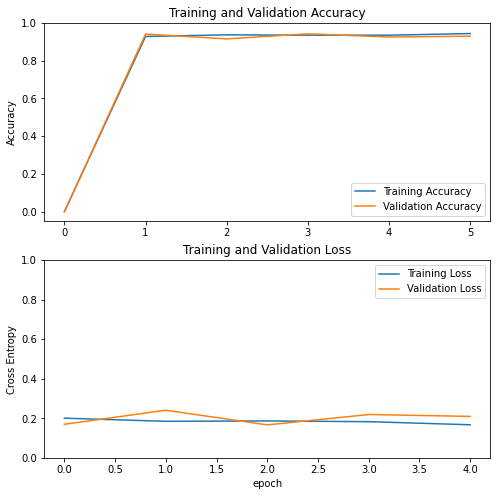

In [20]:
acc = [0.] + history.history['accuracy']
val_acc = [0.] + history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [21]:
def apple_model2(model_input: Tensor, data_augmentation=data_augmenter()):

    
    

    

    
    base_model = tf.keras.applications.vgg19.VGG19(input_shape=input_shape,
                                                   include_top=False, 
                                                   weights='imagenet',input_tensor=model_input) 
    

    base_model.trainable = False

   
    # inputs = tf.keras.Input(shape=input_shape) 
    
   
    data_augmentation = data_augmenter()
    x = data_augmentation(model_input)
   
    x = tf.keras.applications.vgg19.preprocess_input(x) 
    
   
    x = base_model(x, training=False) 
    
   
   
    x = tf.keras.layers.GlobalAveragePooling2D()(x) 
   
    x = tf.keras.layers.Dropout(0.2)(x)
        
   
    x = tf.keras.layers.Dense(10)(x)
    
  
    model = Model(model_input, x, name='model2')
    
    
    
    return model

In [22]:
model2 = apple_model2(model_input, data_augmenter())

80150528/80134624 [==============================] - 0s 0us/step


In [23]:

model2.compile(optimizer='adam',loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [25]:
initial_epochs = 5
history1 = model2.fit(X_train,ytrain, validation_split=0.33 ,epochs=initial_epochs)

Epoch 1/5
298/298 [==============================] - 49s 155ms/step - loss: 2.2855 - accuracy: 0.5030 - val_loss: 0.9134 - val_accuracy: 0.7355
Epoch 2/5
298/298 [==============================] - 44s 147ms/step - loss: 0.9615 - accuracy: 0.7108 - val_loss: 0.6208 - val_accuracy: 0.7954
Epoch 3/5
298/298 [==============================] - 45s 151ms/step - loss: 0.7246 - accuracy: 0.7633 - val_loss: 0.5210 - val_accuracy: 0.8250
Epoch 4/5
298/298 [==============================] - 45s 150ms/step - loss: 0.6314 - accuracy: 0.7922 - val_loss: 0.4869 - val_accuracy: 0.8322
Epoch 5/5
298/298 [==============================] - 45s 151ms/step - loss: 0.5959 - accuracy: 0.8031 - val_loss: 0.4742 - val_accuracy: 0.8367


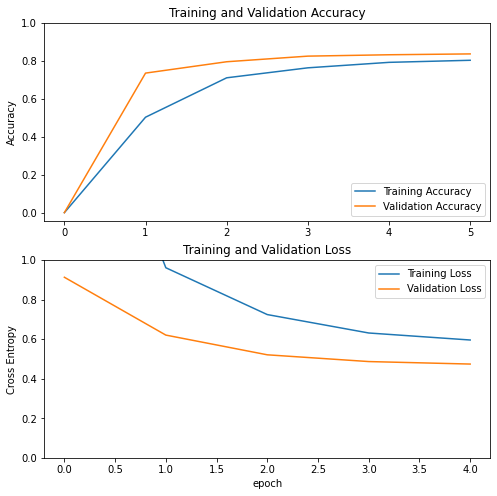

In [26]:
acc = [0.] + history1.history['accuracy']
val_acc = [0.] + history1.history['val_accuracy']

loss = history1.history['loss']
val_loss = history1.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [ ]:
models = [model,model2]

In [ ]:
def ensemble(models: List [training.Model], model_input: Tensor) :
    
    outputs = [model.outputs[0] for model in models]
    y = Average()(outputs)
    
    model = Model(model_input, y, name='ensemble')
    
    return model

In [ ]:
print((model.predict(X_test)[1]))

[ -9.388842   -7.7299023  -6.7773657  -5.65709    -7.474786   -9.80623
 -11.038701   13.88672   -15.047101  -16.87008  ]


In [ ]:
def evaluate_error(model: training.Model) -> np.float64:
    pred = model.predict(X_test, batch_size = 32)
    pred = np.argmax(pred, axis=1)
    pred = np.expand_dims(pred, axis=1) # make same shape as y_test
    error = np.sum(np.not_equal(pred, ytest)) / ytest.shape[0]   
 
    return error

In [ ]:
ensemble_model = ensemble(models,model_input )

ValueError: ignored

In [ ]:
evaluate_error(model)

3009.6287240022484

In [ ]:
from collections import Counter
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
seg_test_folders = '/content/PlantVillage-Dataset/Tomato'

In [ ]:
train_datagen = ImageDataGenerator( rescale = 1.0/255.,shear_range=0.2,zoom_range=0.2,validation_split=0.5)

validation_datagen = ImageDataGenerator(rescale = 1.0/255.,validation_split=0.5)
validation_generator = validation_datagen.flow_from_directory(seg_test_folders, shuffle=True, batch_size=32, class_mode='categorical', target_size=(160, 160))

Found 18159 images belonging to 10 classes.


In [ ]:
# train_datagen = ImageDataGenerator( rescale = 1.0/255.,shear_range=0.2,zoom_range=0.2)
# ​train_generator = train_datagen.flow_from_directory(seg_train_folders,
#                                                     batch_size=32,
#                                                     shuffle=True,
#                                                     class_mode='categorical',
#                                                     target_size=(150, 150))
# ​
# validation_datagen = ImageDataGenerator(rescale = 1.0/255.) #we are only normalising to make the prediction, the other parameters were used for agumentation and train weights
# validation_generator = validation_datagen.flow_from_directory(seg_test_folders, shuffle=True, batch_size=1, class_mode='categorical', target_size=(150, 150))

In [ ]:
from sklearn.metrics import confusion_matrix
import itertools
from sklearn.metrics import classification_report
#from mlxtend.plotting import plot_confusion_matrix
def clf_report(true_value, model_pred):
    
    classes = validation_generator.class_indices.keys()
    TP_count = [true_value[i] == model_pred[i] for i in range(len(true_value))]
    model_accuracy = np.sum(TP_count)/len(TP_count)
    print('Model Accuracy', model_accuracy)
    
    plt.figure(figsize=(7,7))
    cm = confusion_matrix(true_value,model_pred)
    plt.imshow(cm,interpolation='nearest',cmap=plt.cm.viridis)
    plt.title('Confusion Matrix')
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    thresh = cm.max()*0.8
    for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
        plt.text(j,i,cm[i,j],
                horizontalalignment="center",
                color="black" if cm[i,j] > thresh else "white")
        pass
    
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    pass
    
    print(classification_report(true_value, model_pred, target_names = list(classes)))
    

In [ ]:
combined_model_pred = [ c[0] for c in combined_model_pred]


IndexError: ignored

In [ ]:

combined_model_pred.count(2)

18159

In [ ]:
def apple_model3(image_shape=IMG_SIZE, data_augmentation=data_augmenter()):

    
    
    input_shape = image_shape + (3,)
    

    
    base_model = tf.keras.applications.inception_resnet_v2.InceptionResNetV2(input_shape=input_shape,
                                                   include_top=False, 
                                                   weights='imagenet') 
    

    base_model.trainable = False

   
    inputs = tf.keras.Input(shape=input_shape) 
    
   
    data_augmentation = data_augmenter()
    x = data_augmentation(inputs)
   
    x = tf.keras.applications.inception_resnet_v2.preprocess_input(x) 
    
   
    x = base_model(x, training=False) 
    
   
   
    x = tf.keras.layers.GlobalAveragePooling2D()(x) 
   
    x = tf.keras.layers.Dropout(0.2)(x)
        
   
    outputs = tf.keras.layers.Dense(10)(x)
    
  
    
    model = tf.keras.Model(inputs, outputs)
    
    return model

In [ ]:
model3 = apple_model3(IMG_SIZE, data_augmenter())

In [ ]:

model3.compile(optimizer='adam',loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [ ]:
initial_epochs = 10
history = model3.fit(train_dataset, validation_data=validation_dataset, epochs=initial_epochs)

Epoch 1/10
454/454 [==============================] - 64s 140ms/step - loss: 0.7320 - accuracy: 0.7545 - val_loss: 0.6663 - val_accuracy: 0.7833
Epoch 2/10
454/454 [==============================] - 64s 141ms/step - loss: 0.6860 - accuracy: 0.7741 - val_loss: 0.6618 - val_accuracy: 0.7838
Epoch 3/10
454/454 [==============================] - 64s 141ms/step - loss: 0.6339 - accuracy: 0.7913 - val_loss: 0.5848 - val_accuracy: 0.8078
Epoch 4/10
454/454 [==============================] - 64s 140ms/step - loss: 0.6106 - accuracy: 0.7983 - val_loss: 0.5670 - val_accuracy: 0.8133
Epoch 5/10
454/454 [==============================] - 64s 140ms/step - loss: 0.6042 - accuracy: 0.8021 - val_loss: 0.5215 - val_accuracy: 0.8312
Epoch 6/10
454/454 [==============================] - 64s 140ms/step - loss: 0.6010 - accuracy: 0.7969 - val_loss: 0.5203 - val_accuracy: 0.8270
Epoch 7/10
454/454 [==============================] - 64s 140ms/step - loss: 0.5777 - accuracy: 0.8095 - val_loss: 0.5191 - val_ac

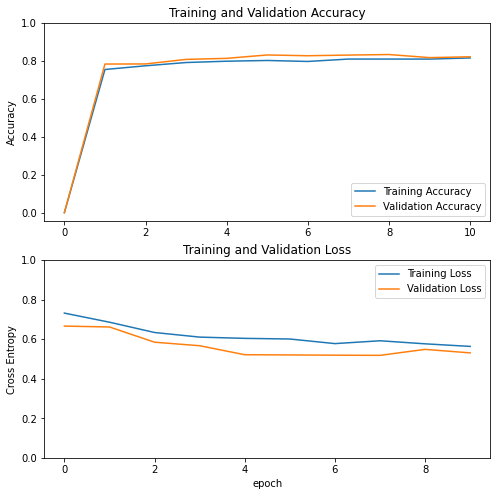

In [ ]:
acc = [0.] + history.history['accuracy']
val_acc = [0.] + history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()